#Análisis de Datos de Consumo de Combustible y Emisiones de CO2


#Importamos las librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')


sns.set_palette('colorblind')
sns.set(style="darkgrid")

#Cargamos los datos

In [ ]:
df = pd.read_csv('sample_data/FuelConsumptionCo2.csv')

#Análisis exploratorio de datos

Dimensiones del dataset

In [ ]:
print(df.shape)

(1067, 13)


In [ ]:
print(df.head(5))

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [ ]:
print(df.tail(5))

      MODELYEAR   MAKE     MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
1062       2014  VOLVO  XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO  XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO  XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO  XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO  XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
1062                  11.8               

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

In [ ]:
print(df.describe())

       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

#Validacion y limpieza de valores en el CSV

In [ ]:
print("Formato de las columnas: ")
print(df.dtypes)

Formato de las columnas: 
MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object


In [ ]:
print("Valores nulos: ")
print(df.isnull().sum())

Valores nulos: 
MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


In [ ]:
print("Valores duplicados: ")
print(df.duplicated().sum())

Valores duplicados: 
0


#Revision de variables numericas

In [ ]:
num_cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
                'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
                'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

print(df[num_cols].describe())

        ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
count  1067.000000  1067.000000           1067.000000          1067.000000   
mean      3.346298     5.794752             13.296532             9.474602   
std       1.415895     1.797447              4.101253             2.794510   
min       1.000000     3.000000              4.600000             4.900000   
25%       2.000000     4.000000             10.250000             7.500000   
50%       3.400000     6.000000             12.600000             8.800000   
75%       4.300000     8.000000             15.550000            10.850000   
max       8.400000    12.000000             30.200000            20.500000   

       FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
count           1067.000000               1067.000000   1067.000000  
mean              11.580881                 26.441425    256.228679  
std                3.485595                  7.468702     63.372304  
min              

In [ ]:
print("\nMediana:")
print(df[num_cols].median())

print("\nRango (Máximo - Mínimo):")
print(df[num_cols].max() - df[num_cols].min())

print("\nDesviación estándar:")
print(df[num_cols].std())


Mediana:
ENGINESIZE                    3.4
CYLINDERS                     6.0
FUELCONSUMPTION_CITY         12.6
FUELCONSUMPTION_HWY           8.8
FUELCONSUMPTION_COMB         10.9
FUELCONSUMPTION_COMB_MPG     26.0
CO2EMISSIONS                251.0
dtype: float64

Rango (Máximo - Mínimo):
ENGINESIZE                    7.4
CYLINDERS                     9.0
FUELCONSUMPTION_CITY         25.6
FUELCONSUMPTION_HWY          15.6
FUELCONSUMPTION_COMB         21.1
FUELCONSUMPTION_COMB_MPG     49.0
CO2EMISSIONS                380.0
dtype: float64

Desviación estándar:
ENGINESIZE                   1.415895
CYLINDERS                    1.797447
FUELCONSUMPTION_CITY         4.101253
FUELCONSUMPTION_HWY          2.794510
FUELCONSUMPTION_COMB         3.485595
FUELCONSUMPTION_COMB_MPG     7.468702
CO2EMISSIONS                63.372304
dtype: float64


In [ ]:
categ_cols = ['MAKE', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'] #Definimos las variables categoricas

for col in categ_cols:
    print(f"\nFrecuencia de categorías para {col}:")
    print(df[col].value_counts())
    print(f"Número de categorías únicas: {df[col].nunique()}")


Frecuencia de categorías para MAKE:
MAKE
FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
INFINITI         21
HONDA            21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
LINCOLN          11
VOLVO            11
FIAT             10
SCION             9
BENTLEY           8
ASTON MARTIN      7
ROLLS-ROYCE       7
MASERATI          6
LAMBORGHINI       3
SRT               2
SMART             2
Name: count, dtype: int64
Número de categorías únicas: 39

Frecuencia de categorías para VEHICLECLASS:
VEHICLECLASS
MID-SIZE                    178
COMPACT                     17

#Visualizacion de los datos

Distribuciones

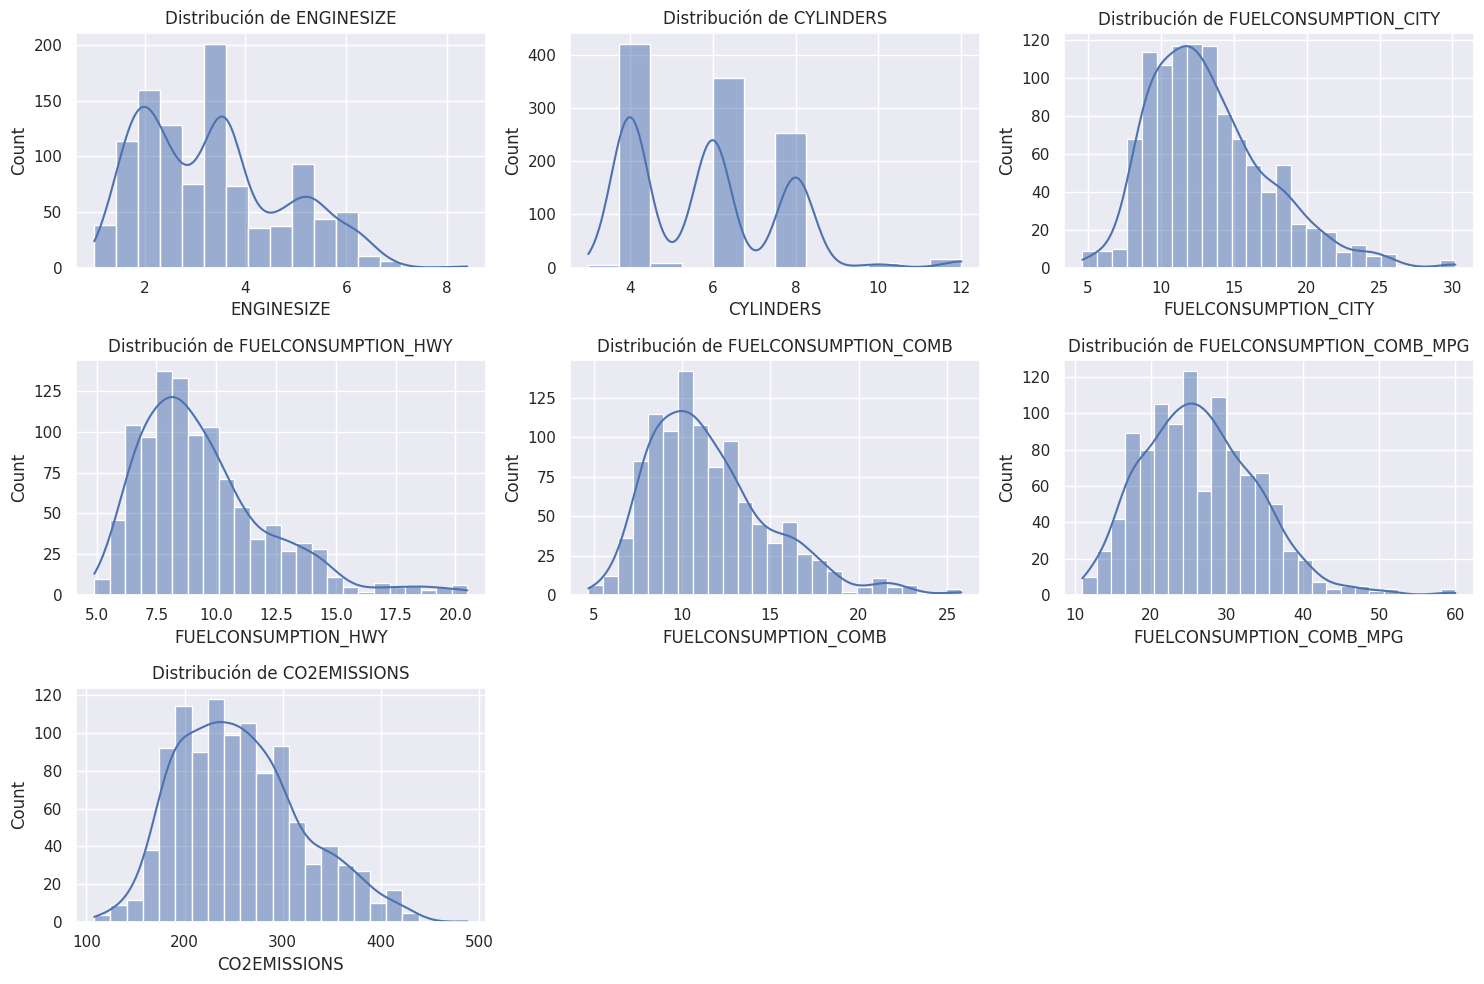

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

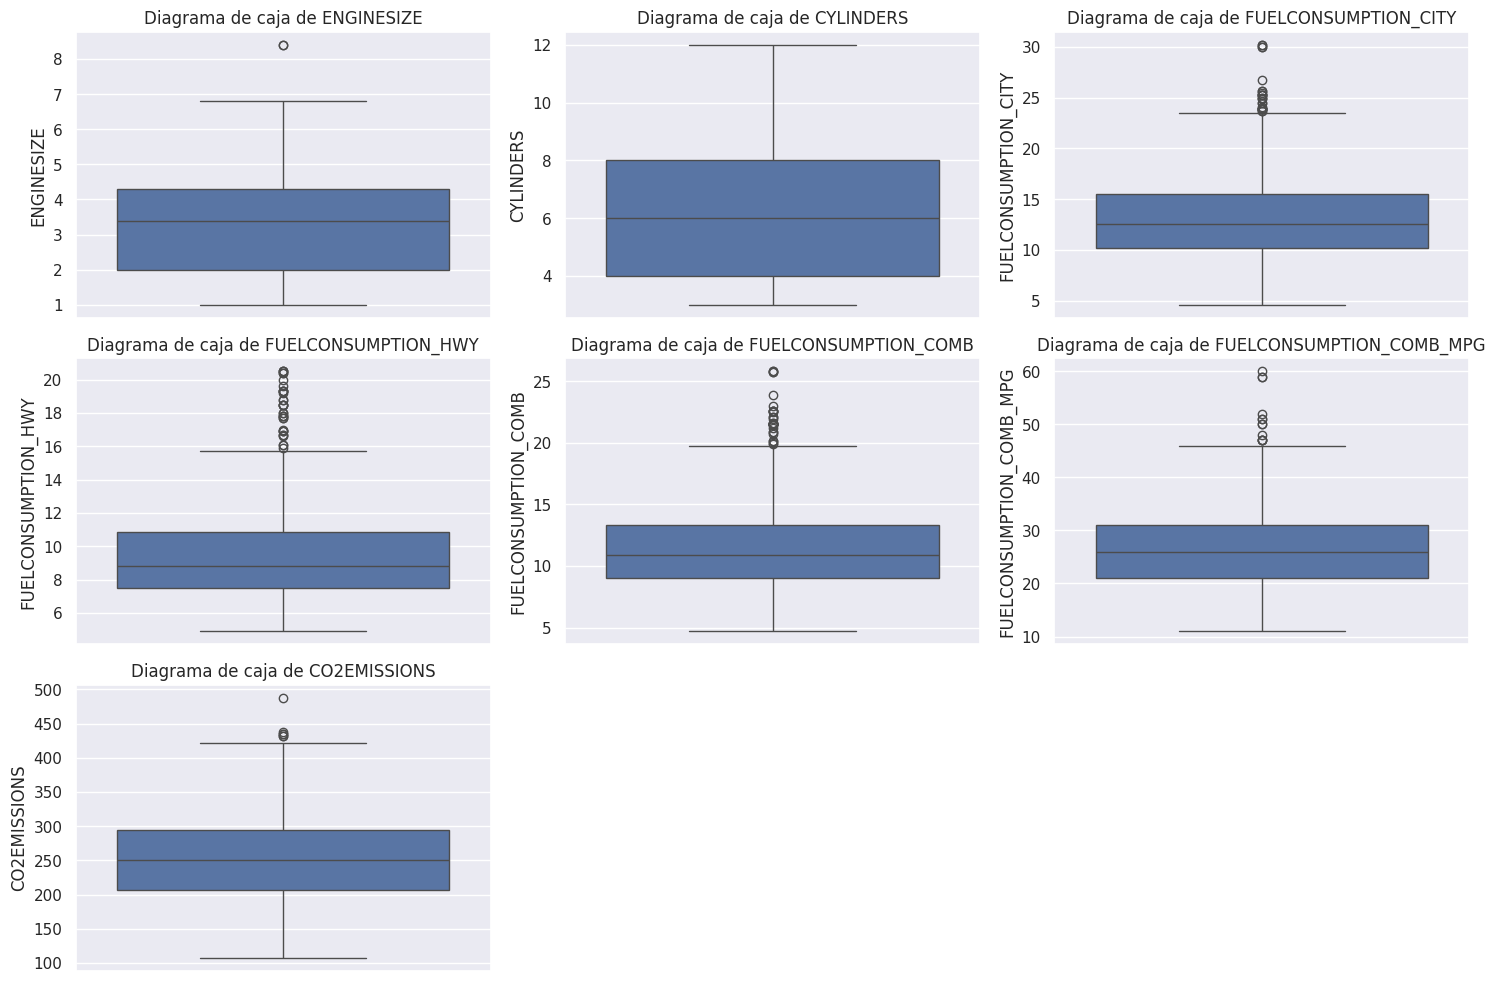

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Diagrama de caja de {col}')
plt.tight_layout()
plt.show()

Relaciones entre variables

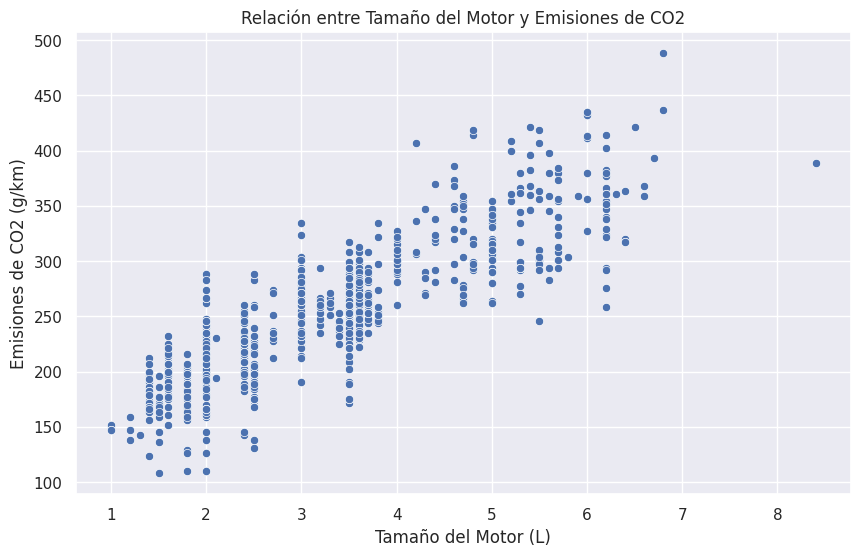

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df)
plt.title('Relación entre Tamaño del Motor y Emisiones de CO2')
plt.xlabel('Tamaño del Motor (L)')
plt.ylabel('Emisiones de CO2 (g/km)')
plt.show()

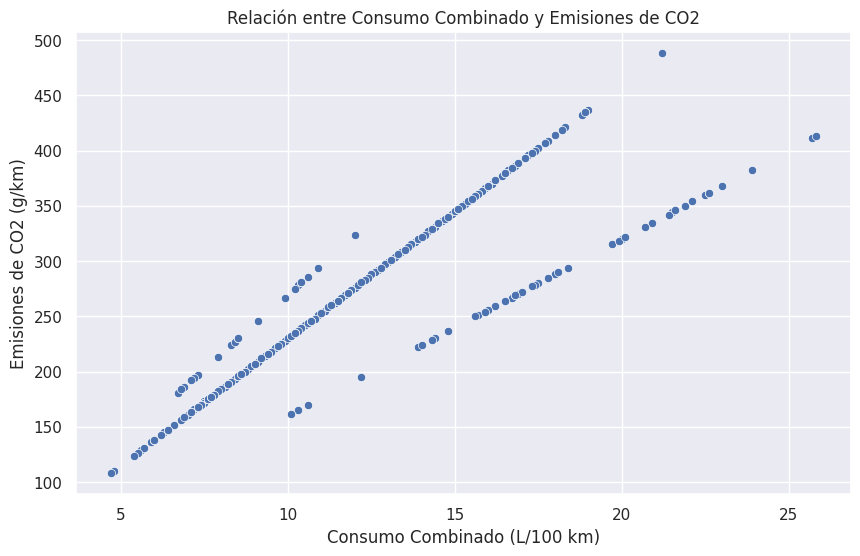

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=df)
plt.title('Relación entre Consumo Combinado y Emisiones de CO2')
plt.xlabel('Consumo Combinado (L/100 km)')
plt.ylabel('Emisiones de CO2 (g/km)')
plt.show()

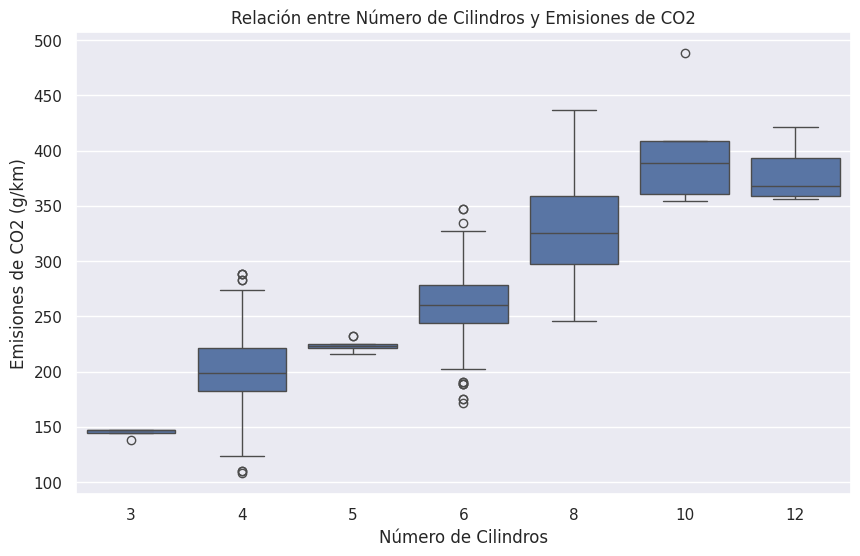

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CYLINDERS', y='CO2EMISSIONS', data=df)
plt.title('Relación entre Número de Cilindros y Emisiones de CO2')
plt.xlabel('Número de Cilindros')
plt.ylabel('Emisiones de CO2 (g/km)')
plt.show()

#Identificación de relaciones

---




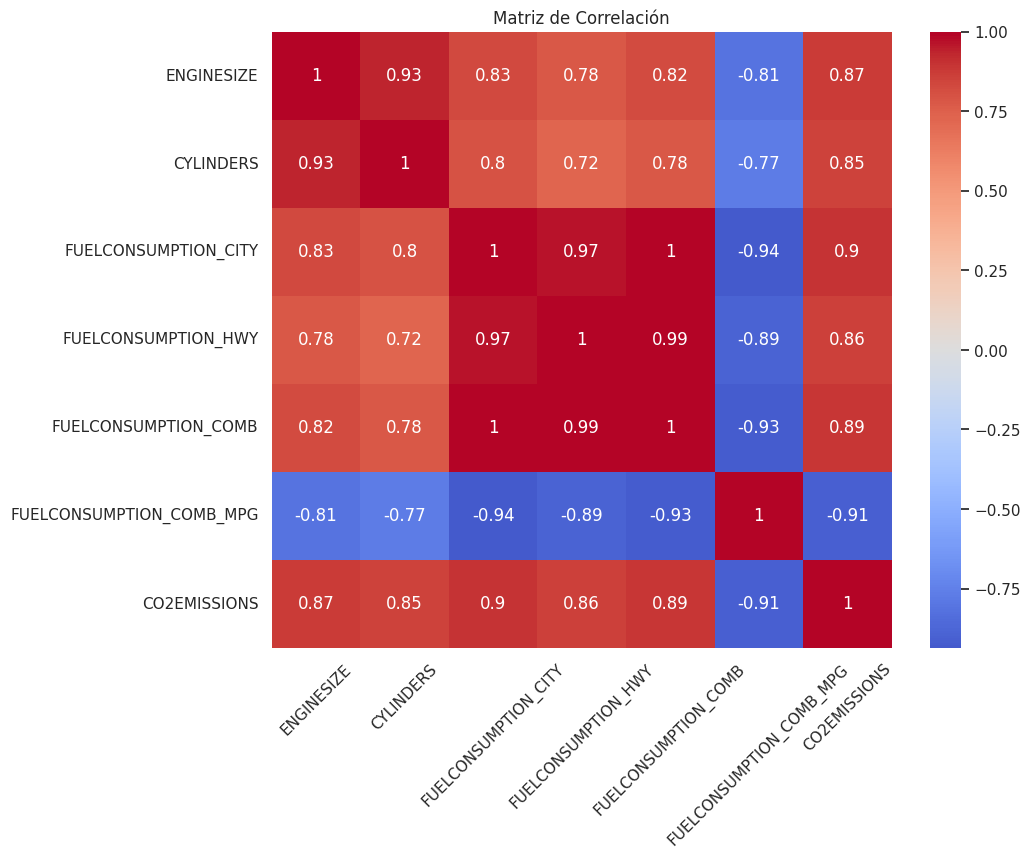

In [ ]:
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print("\nCorrelación entre tamaño del motor y emisiones de CO2:",
      df['ENGINESIZE'].corr(df['CO2EMISSIONS']))
print("Correlación entre consumo combinado y emisiones de CO2:",
      df['FUELCONSUMPTION_COMB'].corr(df['CO2EMISSIONS']))
print("Correlación entre número de cilindros y consumo de combustible:",
      df['CYLINDERS'].corr(df['FUELCONSUMPTION_COMB']))


Correlación entre tamaño del motor y emisiones de CO2: 0.8741543683958118
Correlación entre consumo combinado y emisiones de CO2: 0.8921285933157567
Correlación entre número de cilindros y consumo de combustible: 0.7767878231909753


#Valores Atípicos


In [ ]:
high_emissions = df[df['CO2EMISSIONS'] > 400] #Valores en las emisiones de Co2
print("\nVehículos con emisiones > 400 g/km:")
print(high_emissions[['MAKE', 'MODEL', 'ENGINESIZE', 'CYLINDERS', 'CO2EMISSIONS']])



Vehículos con emisiones > 400 g/km:
              MAKE                   MODEL  ENGINESIZE  CYLINDERS  \
45            AUDI                      R8         4.2          8   
47            AUDI                      R8         5.2         10   
49            AUDI               R8 SPYDER         4.2          8   
51            AUDI               R8 SPYDER         5.2         10   
75         BENTLEY                MULSANNE         6.8          8   
223      CHEVROLET  EXPRESS 2500 PASSENGER         4.8          8   
224      CHEVROLET  EXPRESS 2500 PASSENGER         6.0          8   
225      CHEVROLET  EXPRESS 2500 PASSENGER         6.0          8   
226      CHEVROLET  EXPRESS 3500 PASSENGER         4.8          8   
227      CHEVROLET  EXPRESS 3500 PASSENGER         6.0          8   
228      CHEVROLET  EXPRESS 3500 PASSENGER         6.0          8   
349           FORD              E350 WAGON         6.8         10   
350           FORD          E350 WAGON FFV         5.4          8 

In [ ]:
large_engines = df[df['ENGINESIZE'] > 6.5] #Motores grandes
print("\nVehículos con motores > 6.5 L:")
print(large_engines[['MAKE', 'MODEL', 'ENGINESIZE', 'CYLINDERS', 'CO2EMISSIONS']])


Vehículos con motores > 6.5 L:
            MAKE                   MODEL  ENGINESIZE  CYLINDERS  CO2EMISSIONS
75       BENTLEY                MULSANNE         6.8          8           437
349         FORD              E350 WAGON         6.8         10           488
922  ROLLS-ROYCE                   GHOST         6.6         12           368
923  ROLLS-ROYCE               GHOST EWB         6.6         12           368
924  ROLLS-ROYCE                 PHANTOM         6.7         12           393
925  ROLLS-ROYCE           PHANTOM COUPE         6.7         12           393
926  ROLLS-ROYCE  PHANTOM DROPHEAD COUPE         6.7         12           393
927  ROLLS-ROYCE             PHANTOM EWB         6.7         12           393
928  ROLLS-ROYCE                  WRAITH         6.6         12           359
940          SRT             VIPER COUPE         8.4         10           389
941          SRT         VIPER GTS COUPE         8.4         10           389


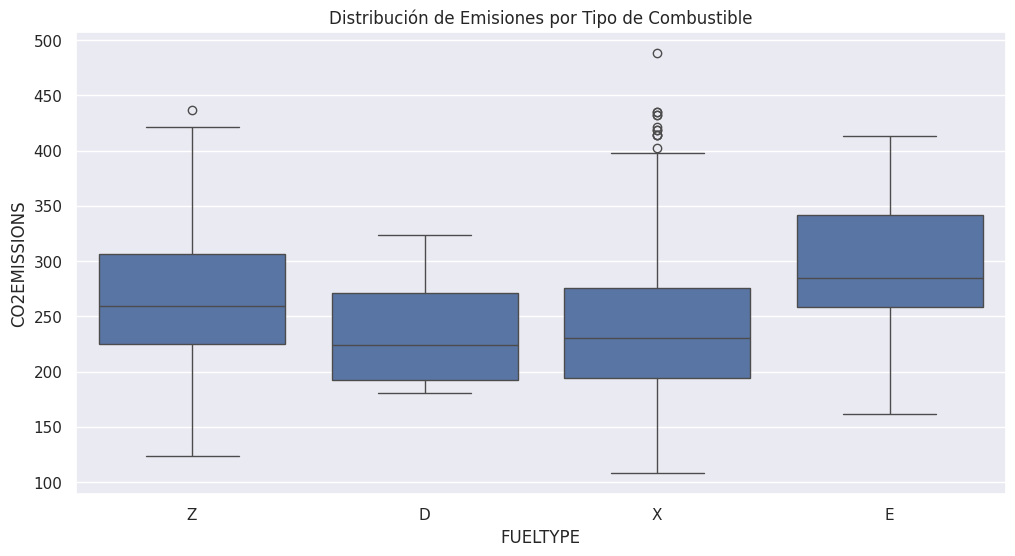

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='FUELTYPE', y='CO2EMISSIONS', data=df)
plt.title('Distribución de Emisiones por Tipo de Combustible')
plt.show()

Eficiencia por Tipo de Vehículo


In [ ]:
vehicle_class_stats = df.groupby('VEHICLECLASS')[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']].mean()
vehicle_class_stats = vehicle_class_stats.sort_values('CO2EMISSIONS', ascending=False)

print("\nEstadísticas por clase de vehículo:")
print(vehicle_class_stats)

print("\nEstadísticas por clase de vehículo:")
print(vehicle_class_stats)


Estadísticas por clase de vehículo:
                          FUELCONSUMPTION_COMB  CO2EMISSIONS
VEHICLECLASS                                                
VAN - PASSENGER                      20.328000    401.000000
VAN - CARGO                          18.718182    361.500000
PICKUP TRUCK - STANDARD              14.956452    309.096774
SUV - STANDARD                       14.530909    307.672727
PICKUP TRUCK - SMALL                 12.358333    284.250000
FULL-SIZE                            12.159302    267.651163
TWO-SEATER                           11.552113    265.676056
MINIVAN                              12.385714    260.142857
SUBCOMPACT                           10.981538    252.615385
SUV - SMALL                          10.696104    242.694805
STATION WAGON - MID-SIZE             10.250000    235.666667
MINICOMPACT                          10.242553    235.553191
SPECIAL PURPOSE VEHICLE              10.228571    235.285714
MID-SIZE                              9.942697  

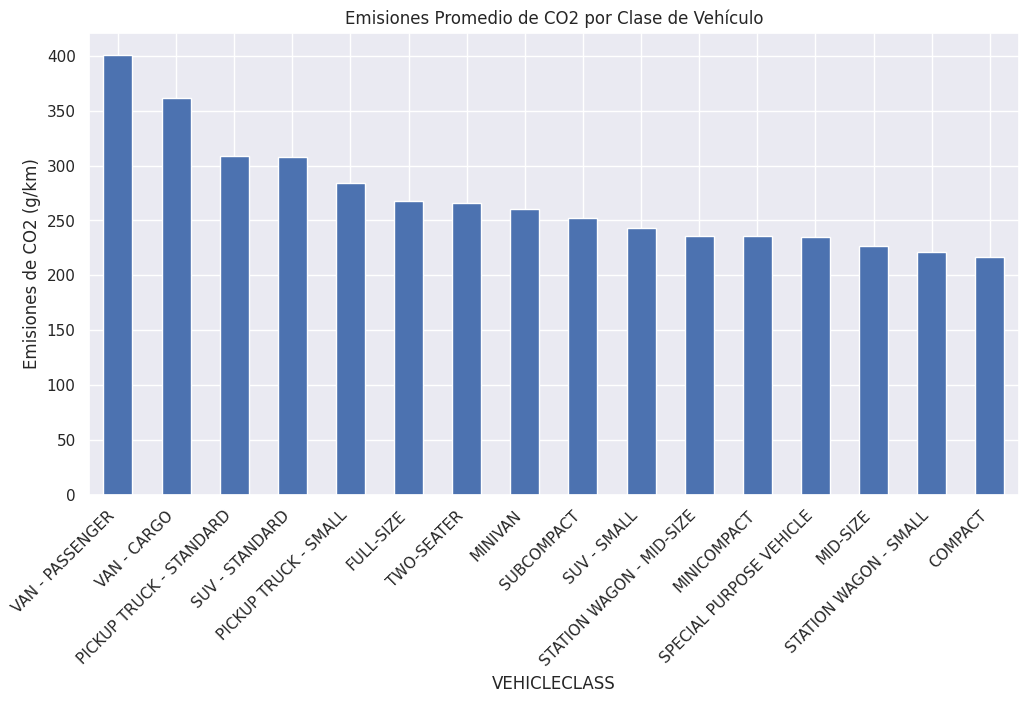

In [ ]:
plt.figure(figsize=(12, 6))
vehicle_class_stats['CO2EMISSIONS'].plot(kind='bar')
plt.title('Emisiones Promedio de CO2 por Clase de Vehículo')
plt.ylabel('Emisiones de CO2 (g/km)')
plt.xticks(rotation=45, ha='right')
plt.show()

Comparación por Tipo de Combustible


In [ ]:
fuel_stats = df.groupby('FUELTYPE')[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']].mean()

print("\nEstadísticas por tipo de combustible:")
print(fuel_stats)


Estadísticas por tipo de combustible:
          FUELCONSUMPTION_COMB  CO2EMISSIONS
FUELTYPE                                    
D                     8.437037    227.777778
E                    18.194565    291.086957
X                    10.482490    241.097276
Z                    11.675346    268.529954


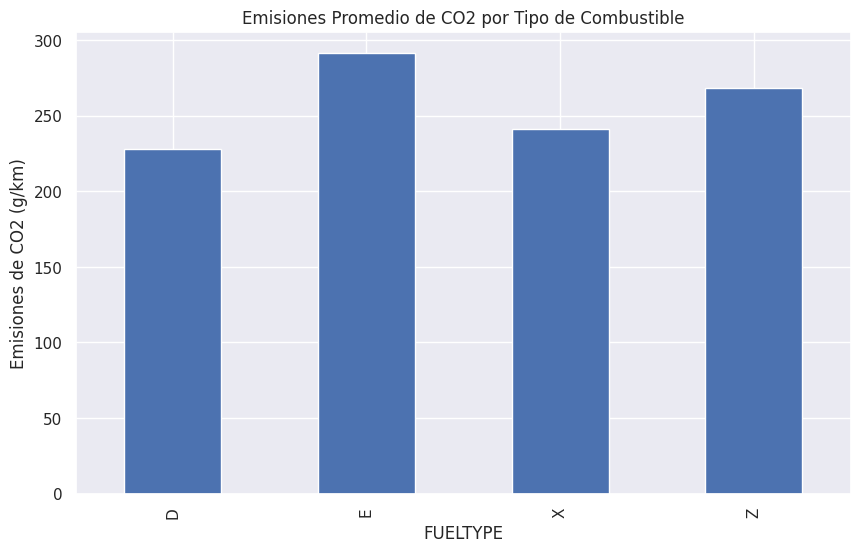

In [ ]:
plt.figure(figsize=(10, 6))
fuel_stats['CO2EMISSIONS'].plot(kind='bar')
plt.title('Emisiones Promedio de CO2 por Tipo de Combustible')
plt.ylabel('Emisiones de CO2 (g/km)')
plt.show()

#Machine Learning

Definimos las variables

In [ ]:
X = df.drop(columns=['CO2EMISSIONS', 'MODELYEAR', 'MAKE', 'MODEL'])
y = df['CO2EMISSIONS']

Redefinimos las variables columnas categóricas y numéricas

In [ ]:
categ_cols = ['VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']
num_cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
                'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
                'FUELCONSUMPTION_COMB_MPG']

Preprocesamiento, sscalar numéricas y codificar categóricas

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categ_cols)
    ])

Dividimos datos en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (853, 9)
Tamaño del conjunto de prueba: (214, 9)


Preprocesamos datos para clustering


In [ ]:
preprocessed_data = preprocessor.fit_transform(X)

In [ ]:
pca = PCA(n_components=2) # Reducción de dimensionalidad
data_2d = pca.fit_transform(preprocessed_data)

Método del codo


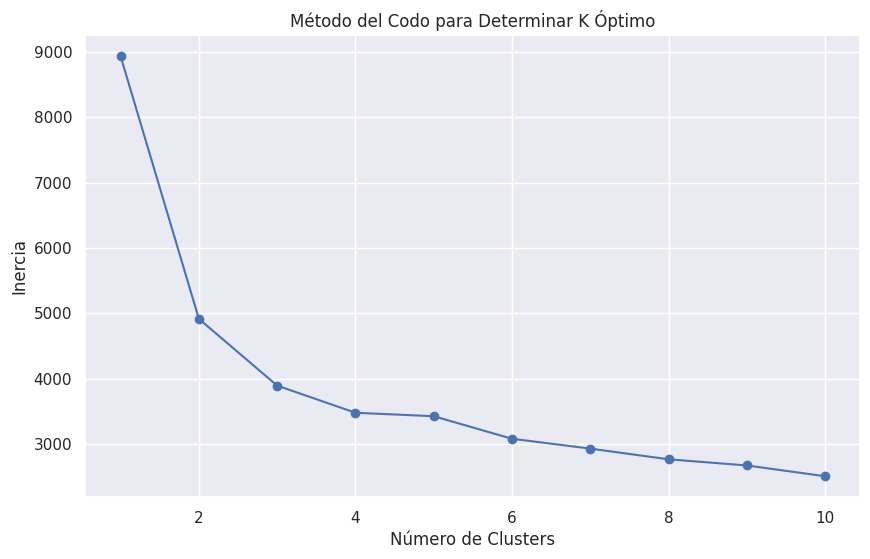

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(preprocessed_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar K Óptimo')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42) # Aplicar K-Means
clusters = kmeans.fit_predict(preprocessed_data)

Visualizar clusters


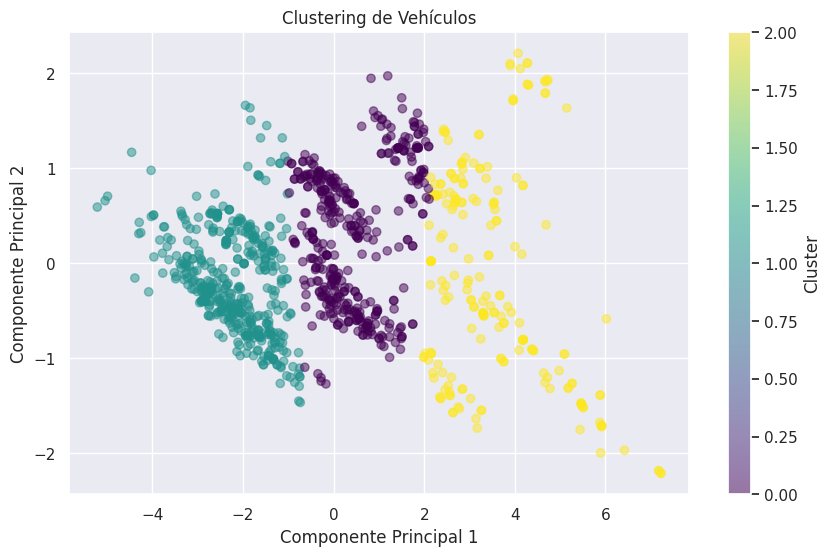

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Clustering de Vehículos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

Analizamos características de cada cluster

In [ ]:
df['Cluster'] = clusters
cluster_stats = df.groupby('Cluster')[num_cols].mean()
print("Estadísticas por cluster:")
print(cluster_stats)

Estadísticas por cluster:
         ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
Cluster                                                                     
0          3.734398   6.368550             13.728993             9.531204   
1          2.027727   4.106818              9.748636             7.251364   
2          5.265455   8.109091             19.592273            13.816364   

         FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  
Cluster                                                  
0                   11.842506                 24.078624  
1                    8.630682                 33.400000  
2                   16.997273                 16.895455  
